# 8. Deep Learning. TensorFlow

## 8.1 Fashion classification

In [ ]:
#!git clone https://github.com/alexeygrigorev/clothing-dataset-small.git ./dataset/clothing-dataset-small

## 8.2 TensorFlow and Keras

* Installing TensorFlow
* Loading images

<a href="https://www.youtube.com/watch?v=R6o_CUmoN9Q&list=PL3MmuxUbc_hIhxl5Ji8t4O6lPAOpHaCLR"><img src="images/thumbnail-8-02.jpg"></a>
 

[Tensorflow documentation](https://www.tensorflow.org/api_docs/python/tf/keras/utils/load_img)

Notes:

- TensorFlow is a library to train deep learning models and Keras is higher level abstraction on the top of TensorFlow. Keras used to be separate library but from tensorflow 2+ version, keras became part of the tensorflow library. The libraries can be installed using `pip install tensorflow` (for CPU and GPU). However, additional setup is required to integrate TensorFlow with GPU. 
- Neural networks expect an image of a certain size, therefore, we need to provide the image size in `target_size` parameter of the `load_img` function.
- Each image consists of pixel and each of these pixels has the shape of 3 dimensions ***(height, width, color channels)***
- A typical color image consists of three color channels: `red`, `green` and `blue`. Each color channel has 8 bits or 1 byte and can represent distinct values between 0-256 (uint8 type).

**Classes, functions, and methods**:

- `import tensorflow as tf`: to import tensorflow library
- `from tensorflow import keras`: to import keras
- `from tensorflow.keras.preprocessing.image import load_img`: to import load_img function
- `load_img('path/to/image', targe_size=(150,150))`: to load the image of 150 x 150 size in PIL format
- `np.array(img)`: convert image into a numpy array of 3D shape, where each row of the array represents the value of red, green, and blue color channels of one pixel in the image.


## Notes

Add notes from the video (PRs are welcome)

* tensorflow and keras as deep learning libraries
* end-to-end open source machine learning framework
* tensorflow as library for training deep learning models
* keras as high-level abstraction on top of tensorflow
* installing tensorflow
* local vs cloud configuration
* loading and preprocessing images
* keras is part of tensorflow since version 2.0
* working with different image sizes
* processing images using the python pillow library
* encoding images as numpy arrays
* image size (i.e. 150 x 150 pixels) multiplied by number of colors (i.e. RGB) equals shape of array
* numpy array dtype as unsigned int8 (uint8) which includes the range from 0 to 255

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import load_img

%matplotlib inline

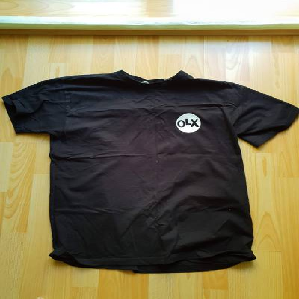

In [14]:
path = './dataset/clothing-dataset-small/train/t-shirt'
name = '5f0a3fa0-6a3d-4b68-b213-72766a643de7.jpg'
fullname = f'{path}/{name}'
img = load_img(fullname, target_size=(299, 299))
img

In [15]:
x = np.array(img)
x.shape

(299, 299, 3)

In [16]:
x

array([[[179, 171,  99],
        [179, 171,  99],
        [181, 173, 101],
        ...,
        [251, 253, 248],
        [251, 253, 248],
        [251, 254, 247]],

       [[188, 179, 112],
        [187, 178, 111],
        [186, 177, 108],
        ...,
        [251, 252, 247],
        [251, 252, 247],
        [251, 252, 246]],

       [[199, 189, 127],
        [200, 190, 128],
        [200, 191, 126],
        ...,
        [250, 251, 245],
        [250, 251, 245],
        [250, 251, 245]],

       ...,

       [[165, 151,  76],
        [173, 159,  84],
        [171, 157,  82],
        ...,
        [183, 135,  25],
        [181, 133,  22],
        [183, 135,  24]],

       [[165, 151,  76],
        [173, 159,  84],
        [171, 157,  82],
        ...,
        [182, 134,  23],
        [180, 132,  21],
        [182, 134,  23]],

       [[165, 151,  76],
        [173, 159,  84],
        [171, 157,  82],
        ...,
        [181, 133,  22],
        [179, 131,  20],
        [182, 134,  23]]

## 8.3 Pre-trained convolutional neural networks

* Imagenet dataset: https://www.image-net.org/
* Pre-trained models: https://keras.io/api/applications/


* [Renting a GPU with AWS SageMaker](https://livebook.manning.com/book/machine-learning-bookcamp/appendix-e/6) 

- The `keras.applications` module has different pre-trained models with different architectures. We'll use the model [Xception](https://keras.io/api/applications/xception/) which takes the input image size of `(229, 229)` and each image's pixel is scaled between `-1` and `1`.
- We create the instance of the pre-trained model using `model = Xception(weights='imagenet', input_shape=(299, 229, 3))`. Our model will use the weights from pre-trained imagenet and expect the input shape of (229, 229, 3) for images.
- Along with image size, the model also expects the `batch_size` which is the size of the batches of data (default 32). If one image is passed to the model, then the expected shape of the model should be (1, 229, 229, 3).
- The image data was peprocessed using `preprocess_input` function during `Xception` model's pre-taining. Therefore, we'll have to use this function on our data before making predictions, like so: `X = preprocess_input(X)`.
- The `pred = model.predict(X)` function returns 2D array of shape `(1, 1000)`, where 1000 is the probablity of the image classes. `decode_predictions(pred)` can be used to get the class names and their probabilities in readable format.
- In order to make the pre-trained model useful specific to our case, we'll have to do some tweak, which we'll do in the coming sections.

**Classes, functions, and methods**:
- `from tensorflow.keras.applications.xception import Xception`: import the model from keras applications
- `from tensorflow.keras.application.xception import preprocess_input`: function to perform preprocessing on images
- `from tensorflow.keras.applications.xception import decode_predictions`: extract the predictions class names in the form of tuple of list
- `model.predict(X)`: function to make predictions on the test images

In [7]:
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.applications.xception import decode_predictions

In [9]:
model = Xception(weights='imagenet', input_shape=(299, 299, 3))

91884032/91884032 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [17]:
X = np.array([x])
X.shape

(1, 299, 299, 3)

In [19]:
pred = model.predict(X)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


In [21]:
decode_predictions(pred)

[[('n03775546', 'mixing_bowl', np.float32(0.9950389)),
  ('n03942813', 'ping-pong_ball', np.float32(0.0049610585)),
  ('n04116512', 'rubber_eraser', np.float32(6.9300873e-22)),
  ('n04380533', 'table_lamp', np.float32(3.747223e-23)),
  ('n03445777', 'golf_ball', np.float32(1.02984884e-23))]]

## 8.4 Convolutional neural networks

* Types of layers: convolutional and dense 
* Convolutional layers and filters
* Dense layers

There are more layers. Read here: https://cs231n.github.io/

### What is Convolutional Neural Network?

A convolutional neural network, also know as CNN or ConvNet, is a feed-forward neural network that is generally used to analyze visual images by processing data with grid-like topology. A CNN is used to detect and classify objects in an image. In CNNs, every image is represented in the form of an array of pixel values.

The convoluion operation forms the basis of any CNN. In a convolution operation, the arrays are multiplied element-wise, and the dot product is summed to create a new array, which represents `Wx`.

### Layers in a Convolutional Neural Network

A Convolution neural network has multiple hidden layers that help in extracting information from an image. The four important layers in CNN are:

1. Convolution layer
2. ReLU layer
3. Pooling layer
4. Fully connected layer (also called Dense layer)

**Convolution layer**

This is the first step in the process of extracting valuable features from an image. A convolution layer has several filters that perform the convolution operation. Every image is considered as a matrix of pixel values.

Consider a black and white image of 5x5 size whose pixel values are either 0 or 1 and also a filter matrix with a dimension of 3x3. Next, slide the filter matrix over the image and compute the dot product to get the convolved feature matrix.

**ReLU layer**

Once the feature maps are extracted, the next step is to move them to a ReLU layer. ReLU (Rectified Linear Unit) is an activation function which performs an element-wise operation and sets all the negative pixels to 0. It introduces non-linearity to the network, and the generated output is a rectified feature map. The relu function is: `f(x) = max(0,x)`.

**Pooling layer**

Pooling is a down-sampling operation that reduces the dimensionality of the feature map. The rectified feature map goes through a pooling layer to generate a pooled feature map.

Imagine a rectified feature map of size 4x4 goes through a max pooling filter of 2x2 size with stride of 2. In this case, the resultant pooled feature map will have a pooled feature map of 2x2 size where each value will represent the maximum value of each stride.

The pooling layer uses various filters to identify different parts of the image like edges, shapes etc.

**Fully Connected layer**

The next step in the process is called flattening. Flattening is used to convert all the resultant 2D arrays from pooled feature maps into a single linear vector. This flattened vector is then fed as input to the fully connected layer to classify the image.

**Convolutional Neural Networks in a nutshell**

- The pixels from the image are fed to the convolutional layer that performs the convolution operation
- It results in a convolved map
- The convolved map is applied to a ReLU function to generate a rectified feature map
- The image is processed with multiple convolutions and ReLU layers for locating the features
- Different pooling layers with various filters are used to identify specific parts of the image
- The pooled feature map is flattened and fed to a fully connected layer to get the final output

**Links**:
- Learn [CNN](https://poloclub.github.io/cnn-explainer/) in the browser

## Notes

Add notes from the video (PRs are welcome)

* convolutional neural networks (CNN) consist of different types of layers
* convolutional layer as filters (i.e. 5 x 5)
* dense layers
* sliding the filter across the cells of the entire image
* calculating similarity scores of the different positions of the filter
* creating the feature map, one feature map per filter
* chaining layers of simple and complex filters allows the CNN to "learn"
* resulting in vector representation of image
* activation functions sigmoid for binary classification and softmax for multiclass


## 8.5 Transfer learning

* Reading data with `ImageDataGenerator`
* Train `Xception` on smaller images (150x150)

(Better to run it with a GPU)

Transfer learning is a machine learning method where a model developed for a task is reused as the starting point for a model on a second task. Usually a pretrained model is trained with large volume of images and that is why the convolutional layers and vector representation of this model can be used for other tasks as well. However, the dense layers need to be retrained because they are specific to the dataset to make predictions with. In our problem, we want to keep convoluational layers but we want to train new dense layers.

Following are the steps to create train/validation data for model:

```python
# Build image generator for training (takes preprocessing input function)
train_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

# Load in train dataset into train generator
train_ds = train_gen.flow_from_directory(directory=path/to/train_imgs_dir, # Train images directory
                                         target_size=(150,150), # resize images to train faster
                                         batch_size=32) # 32 images per batch

# Create image generator for validation
val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

# Load in image for validation
val_ds = val_gen.flow_from_directory(directory=path/to/val_imgs_dir, # Validation image directory
                                     target_size=(150,150),
                                     batch_size=32,
                                     shuffle=False) # False for validation
```

Following are the steps to build model from a pretrained model:

```python
# Build base model
base_model = Xception(weights='imagenet',
                      include_top=False, # to create custom dense layer
                      input_shape=(150,150,3))

# Freeze the convolutional base by preventing the weights being updated during training
base_model.trainable = False

# Define expected image shape as input
inputs = keras.Input(shape=(150,150,3))

# Feed inputs to the base model
base = base_model(inputs, training=False) # set False because the model contains BatchNormalization layer

# Convert matrices into vectors using pooling layer
vectors = keras.layers.GlobalAveragePooling2D()(base)

# Create dense layer of 10 classes
outputs = keras.layers.Dense(10)(vectors)

# Create model for training
model = keras.Model(inputs, outputs)
```

Following are the steps to instantiate optimizer and loss function:

```python
# Define learning rate
learning_rate = 0.01

# Create optimizer
optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

# Define loss function
loss = keras.losses.CategoricalCrossentropy(from_logits=True) # to keep the raw output of dense layer without applying softmax

# Compile the model
model.compile(optimizer=optimizer,
              loss=loss,
              metrics=['accuracy']) # evaluation metric accuracy
```

The model is ready to train once it is defined and compiled:

```python
# Train the model, validate it with validation data, and save the training history
history = model.fit(train_ds, epochs=10, validation_data=val_ds)
```

**Classes, function, and attributes**:
- `from tensorflow.keras.preprocessing.image import ImageDataGenerator`: to read the image data and make it useful for training/validation
- `flow_from_directory()`: method to read the images directly from the directory
- `next(train_ds)`: to unpack features and target variables
- `train_ds.class_indices`: attribute to get classes according to the directory structure
- `GlobalAveragePooling2D()`: accepts 4D tensor as input and operates the mean on the height and width dimensionalities for all the channels and returns vector representation of all images
- `CategoricalCrossentropy()`: method to produces a one-hot array containing the probable match for each category in multi classification
- `model.fit()`: method to train model
- `epochs`: number of iterations over all of the training data
- `history.history`: history attribute is a dictionary recording loss and metrics values (accuracy in our case) for each epoch

In [23]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_ds = train_gen.flow_from_directory(
    './dataset/clothing-dataset-small/train',
    target_size=(150, 150),
    batch_size=32
)

Found 3068 images belonging to 10 classes.


In [24]:
train_ds.class_indices

{'dress': 0,
 'hat': 1,
 'longsleeve': 2,
 'outwear': 3,
 'pants': 4,
 'shirt': 5,
 'shoes': 6,
 'shorts': 7,
 'skirt': 8,
 't-shirt': 9}

In [25]:
X, y = next(train_ds)

In [26]:
y[:5]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [27]:
val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = val_gen.flow_from_directory(
    './dataset/clothing-dataset-small/validation',
    target_size=(150, 150),
    batch_size=32,
    shuffle=False
)

Found 341 images belonging to 10 classes.


In [28]:
base_model = Xception(
    weights='imagenet',
    include_top=False,
    input_shape=(150, 150, 3)
)

base_model.trainable = False



inputs = keras.Input(shape=(150, 150, 3))

base = base_model(inputs, training=False)

vectors = keras.layers.GlobalAveragePooling2D()(base)

outputs = keras.layers.Dense(10)(vectors)

model = keras.Model(inputs, outputs)

83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [32]:
preds = model.predict(X)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 885ms/step


In [34]:
preds.shape

(32, 10)

In [29]:
learning_rate = 0.01
optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

loss = keras.losses.CategoricalCrossentropy(from_logits=True)

model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

In [30]:
history = model.fit(train_ds, epochs=10, validation_data=val_ds)

Epoch 1/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 36s 358ms/step - accuracy: 0.6731 - loss: 1.2034 - val_accuracy: 0.7507 - val_loss: 0.9686
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 34s 356ms/step - accuracy: 0.8227 - loss: 0.6069 - val_accuracy: 0.7947 - val_loss: 0.8181
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 34s 351ms/step - accuracy: 0.8774 - loss: 0.3732 - val_accuracy: 0.7859 - val_loss: 0.8702
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 34s 354ms/step - accuracy: 0.9289 - loss: 0.1973 - val_accuracy: 0.8065 - val_loss: 0.9232
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 33s 346ms/step - accuracy: 0.9263 - loss: 0.2160 - val_accuracy: 0.7830 - val_loss: 1.0429
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 34s 359ms/step - accuracy: 0.9524 - loss: 0.1453 - val_accuracy: 0.8270 - val_loss: 0.8936
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 33s 340ms/step - accuracy: 0.9759 - loss: 0.0752 - val_accuracy: 0.8270 - val_loss: 0.8843
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 33s 348ms/step - accuracy: 0.9915 - loss: 0.0411 - val_accu

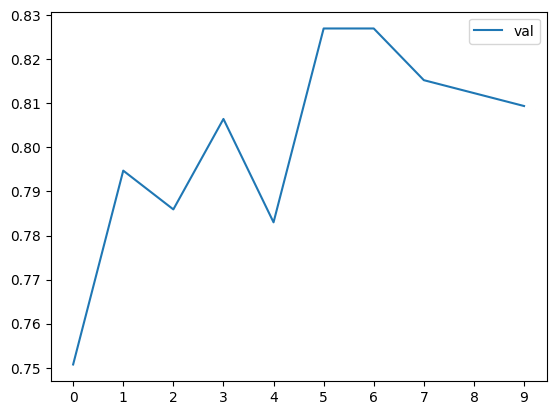

In [37]:
# plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.xticks(np.arange(10))
plt.legend()

## 8.6 Adjusting the learning rate

* What's the learning rate
* Trying different values

One of the most important hyperparameters of deep learning models is the learning rate. It is a tuning parameter in an optimization function that determines the step size (how big or small) at each iteration while moving toward a mininum of a loss function.

Imagine you have a book, and you want to read it. The *learning rate* represents how fast you can read and absorb its content. If you read the book very quickly, you risk forgetting important parts and struggling to recall key details when you need to apply them. On the other hand, reading slowly allows you to study each concept thoroughly and understand it deeply, ensuring better retention. However, if you read too slowly, you might never finish the book. The goal is to find the right reading pace, or learning rate, that balances comprehension and efficiency. Reading too fast may result in superficial understanding, while reading too slowly might mean not acquiring knowledge quickly enough to meet your goals. By maintaining a moderate, balanced pace, you can maximize understanding and effectively apply what you've learned.  

This analogy relates to training machine learning models. Training a model is like reading a book: you're trying to "learn" from the data. Applying that knowledge during testing or validation corresponds to validating the model. If you train the model too quickly (with a high learning rate), it may overfit, memorizing the training data without generalizing well to new data. If you train it too slowly (with a low learning rate), it may underfit, failing to learn enough patterns from the data. A balanced learning rate ensures the model acquires sufficient knowledge and performs well on both training and validation data. 

We can experiement with different learning rates to find the optimal value where the model has best results. In order to try different learning rates, we should define a function to create a function first, for instance:

```python
# Function to create model
def make_model(learning_rate=0.01):
    base_model = Xception(weights='imagenet',
                          include_top=False,
                          input_shape=(150,150,3))

    base_model.trainable = False
    
    #########################################
    
    inputs = keras.Input(shape=(150,150,3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    outputs = keras.layers.Dense(10)(vectors)
    model = keras.Model(inputs, outputs)
    
    #########################################
    
    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    # Compile the model
    model.compile(optimizer=optimizer,
                  loss=loss,
                  metrics=['accuracy'])
    
    return model
```

Next, we can loop over on the list of learning rates:

```python
# Dictionary to store history with different learning rates
scores = {}

# List of learning rates
lrs = [0.0001, 0.001, 0.01, 0.1]

for lr in lrs:
    print(lr)
    
    model = make_model(learning_rate=lr)
    history = model.fit(train_ds, epochs=10, validation_data=val_ds)
    scores[lr] = history.history
    
    print()
    print()
```

Visualizing the training and validation accuracies help us to determine which learning rate value is the best for for the model. One typical way to determine the best value is by looking at the gap between training and validation accuracy. The smaller gap indicates the optimal value of the learning rate.

In [39]:
def make_model(learning_rate=0.01):
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(150, 150, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    outputs = keras.layers.Dense(10)(vectors)
    model = keras.Model(inputs, outputs)
    
    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )
    
    return model

In [40]:
scores = {}

for lr in [0.0001, 0.001, 0.01, 0.1]:
    print(lr)

    model = make_model(learning_rate=lr)
    history = model.fit(train_ds, epochs=10, validation_data=val_ds)
    scores[lr] = history.history

    print()
    print()

0.0001
Epoch 1/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 38s 371ms/step - accuracy: 0.3139 - loss: 1.9919 - val_accuracy: 0.4927 - val_loss: 1.5898
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 34s 357ms/step - accuracy: 0.5508 - loss: 1.4197 - val_accuracy: 0.6100 - val_loss: 1.2327
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 34s 359ms/step - accuracy: 0.6314 - loss: 1.1663 - val_accuracy: 0.6774 - val_loss: 1.0499
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 34s 351ms/step - accuracy: 0.6721 - loss: 1.0206 - val_accuracy: 0.7155 - val_loss: 0.9342
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 34s 350ms/step - accuracy: 0.7014 - loss: 0.9233 - val_accuracy: 0.7654 - val_loss: 0.8611
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 33s 347ms/step - accuracy: 0.7207 - loss: 0.8545 - val_accuracy: 0.7713 - val_loss: 0.8078
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 33s 348ms/step - accuracy: 0.7415 - loss: 0.7987 - val_accuracy: 0.7859 - val_loss: 0.7752
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 33s 346ms/step - accuracy: 0.7552 - loss: 0.7561 - v

In [41]:
scores

{0.0001: {'accuracy': [0.31388527154922485,
   0.5508474707603455,
   0.6313559412956238,
   0.6720991134643555,
   0.7014341354370117,
   0.720664918422699,
   0.741525411605835,
   0.7552151083946228,
   0.7653194069862366,
   0.7764015793800354],
  'loss': [1.991876244544983,
   1.4197204113006592,
   1.1663469076156616,
   1.0205576419830322,
   0.9233142733573914,
   0.8544686436653137,
   0.7986845970153809,
   0.7560781240463257,
   0.7196004986763,
   0.6874681115150452],
  'val_accuracy': [0.49266862869262695,
   0.6099706888198853,
   0.6774193644523621,
   0.7155424952507019,
   0.7653958797454834,
   0.7712609767913818,
   0.7859237790107727,
   0.7947214245796204,
   0.7976539731025696,
   0.8093841671943665],
  'val_loss': [1.589760184288025,
   1.2327057123184204,
   1.049869179725647,
   0.9341710805892944,
   0.8610866069793701,
   0.8078281879425049,
   0.7752151489257812,
   0.7413820624351501,
   0.7190855741500854,
   0.6977199912071228]},
 0.001: {'accuracy': [0.6

In [ ]:
del scores[0.1]
del scores[0.0001]

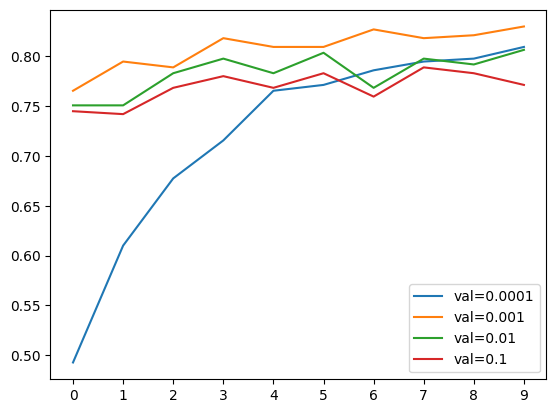

In [42]:
for lr, hist in scores.items():
    #plt.plot(hist['accuracy'], label=('train=%s' % lr))
    plt.plot(hist['val_accuracy'], label=('val=%s' % lr))

plt.xticks(np.arange(10))
plt.legend()

## 8.7 Checkpointing

* Saving the best model only
* Training a model with callbacks

`ModelCheckpoint` callback is used with training the model to save a model or weights in a checkpoint file at some interval, so the model or weights can be loaded later to continue the training from the state saved or to use for deployment.

**Classes, function, and attributes**:

- `keras.callbacks.ModelCheckpoint`: ModelCheckpoint class from keras callbacks api
- `filepath`: path to save the model file
- `monitor`: the metric name to monitor
- `save_best_only`: only save when the model is considered the best according to the metric provided in `monitor`
- `mode`: overwrite the save file based on either maximum or the minimum scores according the metric provided in `monitor`

In [43]:
model.save_weights('model_v1.h5', save_format='h5')

TypeError: Model.save_weights() got an unexpected keyword argument 'save_format'

In [44]:
chechpoint = keras.callbacks.ModelCheckpoint(
    'xception_v1_{epoch:02d}_{val_accuracy:.3f}.h5',
    save_best_only=True,
    monitor='val_accuracy',
    mode='max'
)

In [45]:
learning_rate = 0.001

model = make_model(learning_rate=learning_rate)

history = model.fit(
    train_ds,
    epochs=10,
    validation_data=val_ds,
    callbacks=[chechpoint]
)

Epoch 1/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 307ms/step - accuracy: 0.5103 - loss: 1.5035

96/96 ━━━━━━━━━━━━━━━━━━━━ 35s 348ms/step - accuracy: 0.6294 - loss: 1.1233 - val_accuracy: 0.7742 - val_loss: 0.7245
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 307ms/step - accuracy: 0.7822 - loss: 0.6641

96/96 ━━━━━━━━━━━━━━━━━━━━ 33s 342ms/step - accuracy: 0.7846 - loss: 0.6303 - val_accuracy: 0.8035 - val_loss: 0.6332
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 306ms/step - accuracy: 0.8477 - loss: 0.4996

96/96 ━━━━━━━━━━━━━━━━━━━━ 33s 342ms/step - accuracy: 0.8305 - loss: 0.5155 - val_accuracy: 0.8094 - val_loss: 0.5820
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 35s 366ms/step - accuracy: 0.8572 - loss: 0.4348 - val_accuracy: 0.7977 - val_loss: 0.5712
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 347ms/step - accuracy: 0.8863 - loss: 0.3734

96/96 ━━━━━━━━━━━━━━━━━━━━ 37s 382ms/step - accuracy: 0.8866 - loss: 0.3767 - val_accuracy: 0.8299 - val_loss: 0.5473
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 35s 369ms/step - accuracy: 0.9042 - loss: 0.3264 - val_accuracy: 0.8240 - val_loss: 0.5357
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 33s 344ms/step - accuracy: 0.9169 - loss: 0.2941 - val_accuracy: 0.8240 - val_loss: 0.5231
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 33s 345ms/step - accuracy: 0.9325 - loss: 0.2623 - val_accuracy: 0.8211 - val_loss: 0.5347
Epoch 9/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 34s 358ms/step - accuracy: 0.9413 - loss: 0.2323 - val_accuracy: 0.8299 - val_loss: 0.5466
Epoch 10/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 33s 340ms/step - accuracy: 0.9524 - loss: 0.2135 - val_accuracy: 0.8299 - val_loss: 0.5296


## 8.8 Adding more layers


* Adding one inner dense layer
* Experimenting with different sizes of inner layer

It is also possible to add more layers between the `vector representation layer` and the `output layer` to perform intermediate processing of the vector representation. These layers are the same dense layers as the output but the difference is that these layers use `relu` activation function for non-linearity.

Like learning rates, we should also experiment with different values of inner layer sizes:

```python
# Function to define model by adding new dense layer
def make_model(learning_rate=0.01, size_inner=100): # default layer size is 100
    base_model = Xception(weights='imagenet',
                          include_top=False,
                          input_shape=(150,150,3))

    base_model.trainable = False
    
    #########################################
    
    inputs = keras.Input(shape=(150,150,3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    inner = keras.layers.Dense(size_inner, activation='relu')(vectors) # activation function 'relu'
    outputs = keras.layers.Dense(10)(inner)
    model = keras.Model(inputs, outputs)
    
    #########################################
    
    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    # Compile the model
    model.compile(optimizer=optimizer,
                  loss=loss,
                  metrics=['accuracy'])
    
    return model
```

Next, train the model with different sizes of inner layer:

```python
# Experiement different number of inner layer with best learning rate
# Note: We should've added the checkpoint for training but for simplicity we are skipping it
learning_rate = 0.001

scores = {}

# List of inner layer sizes
sizes = [10, 100, 1000]

for size in sizes:
    print(size)
    
    model = make_model(learning_rate=learning_rate, size_inner=size)
    history = model.fit(train_ds, epochs=10, validation_data=val_ds)
    scores[size] = history.history
    
    print()
    print()
```

Note: It may not always be possible that the model improves. Adding more layers mean introducing complexity in the model, which may not be recommended in some cases.

In the next section, we'll try different regularization technique to improve the performance with the added inner layer.

In [46]:
def make_model(learning_rate=0.01, size_inner=100):
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(150, 150, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    
    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    
    outputs = keras.layers.Dense(10)(inner)
    
    model = keras.Model(inputs, outputs)
    
    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )
    
    return model

In [47]:
learning_rate = 0.001

scores = {}

for size in [10, 100, 1000]:
    print(size)

    model = make_model(learning_rate=learning_rate, size_inner=size)
    history = model.fit(train_ds, epochs=10, validation_data=val_ds)
    scores[size] = history.history

    print()
    print()

10
Epoch 1/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 37s 363ms/step - accuracy: 0.4824 - loss: 1.5437 - val_accuracy: 0.5718 - val_loss: 1.2481
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 35s 367ms/step - accuracy: 0.6385 - loss: 1.0772 - val_accuracy: 0.6833 - val_loss: 0.9982
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 36s 378ms/step - accuracy: 0.7249 - loss: 0.8333 - val_accuracy: 0.7331 - val_loss: 0.8398
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 38s 394ms/step - accuracy: 0.7774 - loss: 0.6751 - val_accuracy: 0.7507 - val_loss: 0.7237
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 36s 377ms/step - accuracy: 0.8204 - loss: 0.5622 - val_accuracy: 0.7801 - val_loss: 0.6806
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 38s 396ms/step - accuracy: 0.8537 - loss: 0.4758 - val_accuracy: 0.7947 - val_loss: 0.6246
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 35s 368ms/step - accuracy: 0.8791 - loss: 0.3976 - val_accuracy: 0.8065 - val_loss: 0.5849
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 34s 357ms/step - accuracy: 0.9025 - loss: 0.3451 - val_a

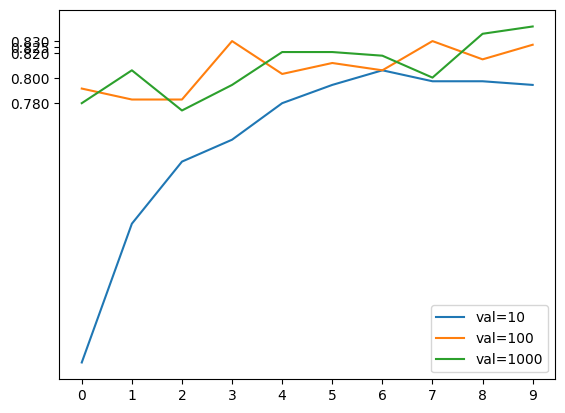

In [50]:
for size, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=('val=%s' % size))

plt.xticks(np.arange(10))
plt.yticks([0.78, 0.80, 0.82, 0.825, 0.83])
plt.legend()

## 8.9 Regularization and dropout

* Regularizing by freezing a part of the network
* Adding dropout to our model
* Experimenting with different values

Dropout is a technique that prevents overfitting in neural networks by randomly dropping nodes of a layer during training. As a result, the trained model works as an ensemble model consisting of multiple neural networks.

From previous experiments we got the best values of learning rate `0.01` and layer size of `100`. We'll use these values for the next experiment along with different values of dropout rates:

```python
# Function to define model by adding new dense layer and dropout
def make_model(learning_rate=0.01, size_inner=100, droprate=0.5):
    base_model = Xception(weights='imagenet',
                          include_top=False,
                          input_shape=(150,150,3))

    base_model.trainable = False
    
    #########################################
    
    inputs = keras.Input(shape=(150,150,3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    drop = keras.layers.Dropout(droprate)(inner) # add dropout layer
    outputs = keras.layers.Dense(10)(drop)
    model = keras.Model(inputs, outputs)
    
    #########################################
    
    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    # Compile the model
    model.compile(optimizer=optimizer,
                  loss=loss,
                  metrics=['accuracy'])
    
    return model


# Create checkpoint to save best model for version 3
filepath = './xception_v3_{epoch:02d}_{val_accuracy:.3f}.h5'
checkpoint = keras.callbacks.ModelCheckpoint(filepath=filepath,
                                             save_best_only=True,
                                             monitor='val_accuracy',
                                             mode='max')

# Set the best values of learning rate and inner layer size based on previous experiments
learning_rate = 0.001
size = 100

# Dict to store results
scores = {}

# List of dropout rates
droprates = [0.0, 0.2, 0.5, 0.8]

for droprate in droprates:
    print(droprate)
    
    model = make_model(learning_rate=learning_rate,
                       size_inner=size,
                       droprate=droprate)
    
    # Train for longer (epochs=30) cause of dropout regularization
    history = model.fit(train_ds, epochs=30, validation_data=val_ds, callbacks=[checkpoint])
    scores[droprate] = history.history
    
    print()
    print()
```

Note: Because we introduce dropout in the neural networks, we will need to train our model for longer, hence, number of epochs is set to `30`.

**Classes, functions, attributes**:

- `tf.keras.layers.Dropout()`: dropout layer to randomly sets input units (i.e, nodes) to 0 with a frequency of rate at each epoch during training
- `rate`: argument to set the fraction of the input units to drop, it is a value of float between 0 and 1


In [51]:
def make_model(learning_rate=0.01, size_inner=100, droprate=0.5):
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(150, 150, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    
    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    drop = keras.layers.Dropout(droprate)(inner)
    
    outputs = keras.layers.Dense(10)(drop)
    
    model = keras.Model(inputs, outputs)
    
    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )
    
    return model

In [ ]:
learning_rate = 0.001
size = 100

scores = {}

for droprate in [0.0, 0.2, 0.5, 0.8]:
    print(droprate)

    model = make_model(
        learning_rate=learning_rate,
        size_inner=size,
        droprate=droprate
    )

    history = model.fit(train_ds, epochs=50, validation_data=val_ds)
    scores[droprate] = history.history

    print()
    print()

0.0
Epoch 1/5
96/96 ━━━━━━━━━━━━━━━━━━━━ 34s 333ms/step - accuracy: 0.6705 - loss: 0.9744 - val_accuracy: 0.8006 - val_loss: 0.6209
Epoch 2/5
96/96 ━━━━━━━━━━━━━━━━━━━━ 30s 317ms/step - accuracy: 0.8243 - loss: 0.5224 - val_accuracy: 0.8035 - val_loss: 0.5685
Epoch 3/5
96/96 ━━━━━━━━━━━━━━━━━━━━ 31s 318ms/step - accuracy: 0.8814 - loss: 0.3591 - val_accuracy: 0.7977 - val_loss: 0.5608
Epoch 4/5
96/96 ━━━━━━━━━━━━━━━━━━━━ 32s 329ms/step - accuracy: 0.9224 - loss: 0.2595 - val_accuracy: 0.8006 - val_loss: 0.5929
Epoch 5/5
96/96 ━━━━━━━━━━━━━━━━━━━━ 31s 326ms/step - accuracy: 0.9472 - loss: 0.1891 - val_accuracy: 0.8270 - val_loss: 0.5090


0.2
Epoch 1/5
96/96 ━━━━━━━━━━━━━━━━━━━━ 34s 334ms/step - accuracy: 0.6395 - loss: 1.0823 - val_accuracy: 0.7742 - val_loss: 0.6668
Epoch 2/5
96/96 ━━━━━━━━━━━━━━━━━━━━ 31s 323ms/step - accuracy: 0.7816 - loss: 0.6219 - val_accuracy: 0.7742 - val_loss: 0.6197
Epoch 3/5
96/96 ━━━━━━━━━━━━━━━━━━━━ 32s 337ms/step - accuracy: 0.8400 - loss: 0.4669 - val_ac

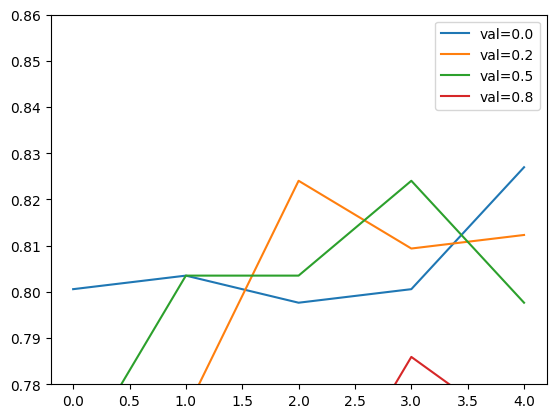

In [54]:
for droprate, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=('val=%s' % droprate))

plt.ylim(0.78, 0.86)
plt.legend()

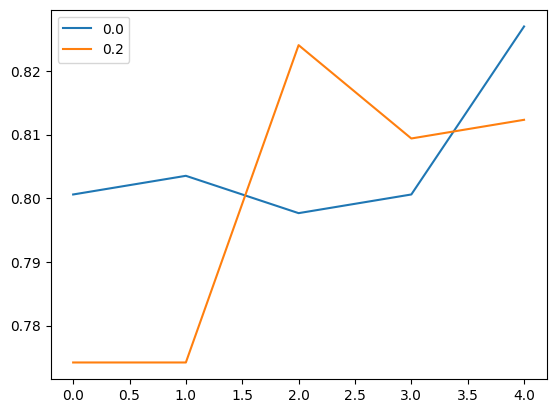

In [55]:
hist = scores[0.0]
plt.plot(hist['val_accuracy'], label=0.0)

hist = scores[0.2]
plt.plot(hist['val_accuracy'], label=0.2)

plt.legend()
#plt.plot(hist['accuracy'], label=('val=%s' % droprate))

## 8.10 Data augmentation

* Different data augmentations
* Training a model with augmentations
* How to select data augmentations?

Data augmentation is a process of artifically increasing the amount of data by generating new images from existing images. This includes adding minor alterations to images by flipping, cropping, adding brightness and/or contrast, and many more.

Keras `ImageDataGenerator` class has many parameters for data augmentation that we can use for generating data. Important thing to remember that the data augmentation should only be implemented on train data, not the validation. Here's how we can generate augmented data for training the model:

```python
# Create image generator for train data and also augment the images
train_gen = ImageDataGenerator(preprocessing_function=preprocess_input,
                               rotation_range=30,
                               width_shift_range=10.0,
                               height_shift_range=10.0,
                               shear_range=10,
                               zoom_range=0.1,
                               vertical_flip=True)

train_ds = train_gen.flow_from_directory(directory=train_imgs_dir,
                                         target_size=(150,150),
                                         batch_size=32)
```

**How to choose augmentations?**

- First step is to use our own judgement, for example, looking at the images (both on train and validation), does it make sense to introduce horizontal flip?
- Look at the dataset, what kind of variations are there? Are objects always centered?
- Augmentations are hyperparameters: like many other hyperparameters, often times we need to test whether image augmentations are useful for the model or not. If the model doesn't improve or have same performance after certain epochs (let's say 20), in that case we don't use it.

Usually augmented data required training for longer.

In [57]:
train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
#     vertical_flip=True,
)

train_ds = train_gen.flow_from_directory(
    './dataset/clothing-dataset-small/train',
    target_size=(150, 150),
    batch_size=32
)

val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = val_gen.flow_from_directory(
    './dataset/clothing-dataset-small/validation',
    target_size=(150, 150),
    batch_size=32,
    shuffle=False
)

Found 3068 images belonging to 10 classes.
Found 341 images belonging to 10 classes.


In [58]:
learning_rate = 0.001
size = 100
droprate = 0.2

model = make_model(
    learning_rate=learning_rate,
    size_inner=size,
    droprate=droprate
)

history = model.fit(train_ds, epochs=50, validation_data=val_ds)

Epoch 1/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 36s 360ms/step - accuracy: 0.6372 - loss: 1.0763 - val_accuracy: 0.7654 - val_loss: 0.7066
Epoch 2/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 33s 340ms/step - accuracy: 0.7764 - loss: 0.6207 - val_accuracy: 0.7889 - val_loss: 0.6300
Epoch 3/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 32s 339ms/step - accuracy: 0.8364 - loss: 0.4661 - val_accuracy: 0.8299 - val_loss: 0.5323
Epoch 4/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 31s 327ms/step - accuracy: 0.8889 - loss: 0.3450 - val_accuracy: 0.8211 - val_loss: 0.5477
Epoch 5/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 33s 343ms/step - accuracy: 0.9107 - loss: 0.2809 - val_accuracy: 0.8387 - val_loss: 0.5251
Epoch 6/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 31s 325ms/step - accuracy: 0.9374 - loss: 0.2174 - val_accuracy: 0.8182 - val_loss: 0.5460
Epoch 7/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 31s 319ms/step - accuracy: 0.9452 - loss: 0.1759 - val_accuracy: 0.8211 - val_loss: 0.5392
Epoch 8/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 31s 321ms/step - accuracy: 0.9570 - loss: 0.1458 - val_accu

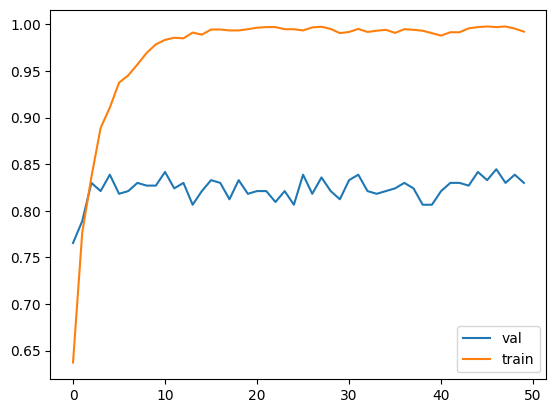

In [59]:
hist = history.history
plt.plot(hist['val_accuracy'], label='val')
plt.plot(hist['accuracy'], label='train')

plt.legend()

## 8.11 Training a larger model

* Train a 299x299 model

In [61]:
def make_model(input_size=150, learning_rate=0.01, size_inner=100,
               droprate=0.5):

    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(input_size, input_size, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(input_size, input_size, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    
    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    drop = keras.layers.Dropout(droprate)(inner)
    
    outputs = keras.layers.Dense(10)(drop)
    
    model = keras.Model(inputs, outputs)
    
    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )
    
    return model

In [62]:
input_size = 299

In [63]:
train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    shear_range=10,
    zoom_range=0.1,
    horizontal_flip=True
)

train_ds = train_gen.flow_from_directory(
    './dataset/clothing-dataset-small/train',
    target_size=(input_size, input_size),
    batch_size=32
)


val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = train_gen.flow_from_directory(
    './dataset/clothing-dataset-small/validation',
    target_size=(input_size, input_size),
    batch_size=32,
    shuffle=False
)

Found 3068 images belonging to 10 classes.
Found 341 images belonging to 10 classes.


In [64]:
checkpoint = keras.callbacks.ModelCheckpoint(
    'xception_v4_1_{epoch:02d}_{val_accuracy:.3f}.h5',
    save_best_only=True,
    monitor='val_accuracy',
    mode='max'
)

In [65]:
learning_rate = 0.0005
size = 100
droprate = 0.2

model = make_model(
    input_size=input_size,
    learning_rate=learning_rate,
    size_inner=size,
    droprate=droprate
)

history = model.fit(train_ds, epochs=50, validation_data=val_ds,
                   callbacks=[checkpoint])

Epoch 1/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.5558 - loss: 1.4116

96/96 ━━━━━━━━━━━━━━━━━━━━ 133s 1s/step - accuracy: 0.6871 - loss: 1.0015 - val_accuracy: 0.8270 - val_loss: 0.5799
Epoch 2/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8220 - loss: 0.5491

96/96 ━━━━━━━━━━━━━━━━━━━━ 136s 1s/step - accuracy: 0.8266 - loss: 0.5242 - val_accuracy: 0.8563 - val_loss: 0.4577
Epoch 3/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 135s 1s/step - accuracy: 0.8520 - loss: 0.4469 - val_accuracy: 0.8387 - val_loss: 0.4607
Epoch 4/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 138s 1s/step - accuracy: 0.8628 - loss: 0.3956 - val_accuracy: 0.8446 - val_loss: 0.4351
Epoch 5/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8714 - loss: 0.3700

96/96 ━━━━━━━━━━━━━━━━━━━━ 126s 1s/step - accuracy: 0.8820 - loss: 0.3569 - val_accuracy: 0.8739 - val_loss: 0.3942
Epoch 6/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9063 - loss: 0.2945

96/96 ━━━━━━━━━━━━━━━━━━━━ 127s 1s/step - accuracy: 0.8924 - loss: 0.3207 - val_accuracy: 0.8798 - val_loss: 0.3672
Epoch 7/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8872 - loss: 0.3085

96/96 ━━━━━━━━━━━━━━━━━━━━ 127s 1s/step - accuracy: 0.8937 - loss: 0.3132 - val_accuracy: 0.8886 - val_loss: 0.3631
Epoch 8/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 127s 1s/step - accuracy: 0.9091 - loss: 0.2723 - val_accuracy: 0.8768 - val_loss: 0.3668
Epoch 9/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 130s 1s/step - accuracy: 0.9130 - loss: 0.2592 - val_accuracy: 0.8798 - val_loss: 0.3881
Epoch 10/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 130s 1s/step - accuracy: 0.9175 - loss: 0.2471 - val_accuracy: 0.8886 - val_loss: 0.3578
Epoch 11/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 131s 1s/step - accuracy: 0.9172 - loss: 0.2337 - val_accuracy: 0.8768 - val_loss: 0.3783
Epoch 12/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9246 - loss: 0.2222

96/96 ━━━━━━━━━━━━━━━━━━━━ 128s 1s/step - accuracy: 0.9241 - loss: 0.2224 - val_accuracy: 0.8915 - val_loss: 0.3651
Epoch 13/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 153s 2s/step - accuracy: 0.9302 - loss: 0.2040 - val_accuracy: 0.8768 - val_loss: 0.3844
Epoch 14/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 139s 1s/step - accuracy: 0.9260 - loss: 0.2026 - val_accuracy: 0.8651 - val_loss: 0.4025
Epoch 15/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 137s 1s/step - accuracy: 0.9338 - loss: 0.1816 - val_accuracy: 0.8739 - val_loss: 0.3849
Epoch 16/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 135s 1s/step - accuracy: 0.9407 - loss: 0.1772 - val_accuracy: 0.8739 - val_loss: 0.3505
Epoch 17/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9475 - loss: 0.1643

96/96 ━━━━━━━━━━━━━━━━━━━━ 124s 1s/step - accuracy: 0.9482 - loss: 0.1628 - val_accuracy: 0.8944 - val_loss: 0.3522
Epoch 18/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 124s 1s/step - accuracy: 0.9443 - loss: 0.1654 - val_accuracy: 0.8739 - val_loss: 0.3584
Epoch 19/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 125s 1s/step - accuracy: 0.9439 - loss: 0.1611 - val_accuracy: 0.8827 - val_loss: 0.3680
Epoch 20/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 124s 1s/step - accuracy: 0.9508 - loss: 0.1418 - val_accuracy: 0.8768 - val_loss: 0.3510
Epoch 21/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 133s 1s/step - accuracy: 0.9553 - loss: 0.1365 - val_accuracy: 0.8827 - val_loss: 0.3800
Epoch 22/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 135s 1s/step - accuracy: 0.9602 - loss: 0.1339 - val_accuracy: 0.8856 - val_loss: 0.4078
Epoch 23/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 130s 1s/step - accuracy: 0.9583 - loss: 0.1312 - val_accuracy: 0.8915 - val_loss: 0.3633
Epoch 24/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 146s 2s/step - accuracy: 0.9606 - loss: 0.1208 - val_accuracy: 0.8915 - val_l

96/96 ━━━━━━━━━━━━━━━━━━━━ 124s 1s/step - accuracy: 0.9831 - loss: 0.0585 - val_accuracy: 0.8974 - val_loss: 0.4138
Epoch 45/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 129s 1s/step - accuracy: 0.9857 - loss: 0.0588 - val_accuracy: 0.8827 - val_loss: 0.4409
Epoch 46/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 138s 1s/step - accuracy: 0.9831 - loss: 0.0595 - val_accuracy: 0.8856 - val_loss: 0.4121
Epoch 47/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 130s 1s/step - accuracy: 0.9837 - loss: 0.0582 - val_accuracy: 0.8622 - val_loss: 0.4520
Epoch 48/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 131s 1s/step - accuracy: 0.9847 - loss: 0.0573 - val_accuracy: 0.8944 - val_loss: 0.3966
Epoch 49/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 135s 1s/step - accuracy: 0.9844 - loss: 0.0519 - val_accuracy: 0.8710 - val_loss: 0.4490
Epoch 50/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 130s 1s/step - accuracy: 0.9883 - loss: 0.0480 - val_accuracy: 0.8798 - val_loss: 0.4041


## 8.12 Using the model

* Loading the model
* Evaluating the model
* Getting predictions

Earlier we used **h5 format** to save our model when creating the checkpoint. The HDF5 format contains the model's architecture, weights values, and `compile()` information. The saved model can be loaded and used for prediction with `keras.models.load_model(path/to/saved_model)` method.

To evaluate the model and make prediction on test data, we'll need to create the same preprocessing steps for the image as we have done with train and validation data:

```python
# Create image generator for test data
test_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

# Path of test images directory
test_imgs_dir = '../input/mlzoomcampimageclassification/zoomcamp-image-classification/clothing-dataset-small/test'

# Load in test images to generator
test_ds = test_gen.flow_from_directory(directory=test_imgs_dir,
                                       target_size=(299,299),
                                       batch_size=32,
                                       shuffle=False)

# Path of an image to make predictions
img_path = 'path/to/image'
# Load image
img = load_img(img_path, target_size=(299,299))

# Convert image to numpy array
x = np.array(img)
# Add batch dimension to the image
X = np.array([x])
# Preprocess the image 
X = preprocess_input(X)
```

The model performance can be evaluated on test data with `model.evaluate(test_ds)` and the prediction on the test image can be made using the method `model.predict(X)`. We can then zip the class names and prediction to see the likelihood.

**Classes, functions, attributes**:

- `keras.models.load_model()`: method to load saved model
- `model.evaluate()`: method to evaluate the performance of the model based on the evaluation metrics
- `model.predict()`: method to make predictions of output depending on the input

In [66]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img

from tensorflow.keras.applications.xception import preprocess_input
import numpy as np

In [68]:
test_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

test_ds = test_gen.flow_from_directory(
    './dataset/clothing-dataset-small/test',
    target_size=(299, 299),
    batch_size=32,
    shuffle=False
)
model = keras.models.load_model('xception_v4_1_44_0.897.h5')

Found 372 images belonging to 10 classes.


In [69]:
model.evaluate(test_ds)

12/12 ━━━━━━━━━━━━━━━━━━━━ 15s 1s/step - accuracy: 0.9059 - loss: 0.2962


[0.2962053418159485, 0.9059139490127563]

In [70]:
path = './dataset/clothing-dataset-small/test/pants/c8d21106-bbdb-4e8d-83e4-bf3d14e54c16.jpg'

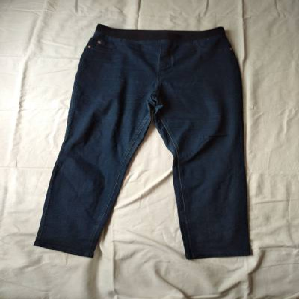

In [72]:
img = load_img(path, target_size=(299, 299))
img

In [73]:
x = np.array(img)
X = np.array([x])
X.shape

(1, 299, 299, 3)

In [74]:
X = preprocess_input(X)

In [75]:
pred = model.predict(X)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 408ms/step


In [76]:
classes = [
    'dress',
    'hat',
    'longsleeve',
    'outwear',
    'pants',
    'shirt',
    'shoes',
    'shorts',
    'skirt',
    't-shirt'
]

In [77]:
dict(zip(classes, pred[0]))

{'dress': np.float32(-4.8257594),
 'hat': np.float32(-7.4775023),
 'longsleeve': np.float32(-0.7085316),
 'outwear': np.float32(-3.715076),
 'pants': np.float32(11.705206),
 'shirt': np.float32(-3.8375397),
 'shoes': np.float32(-6.8736553),
 'shorts': np.float32(3.881629),
 'skirt': np.float32(-7.401996),
 't-shirt': np.float32(-3.5107772)}

## 8.13 Summary

* We can use pre-trained models for general image classification
* Convolutional layers let us turn an image into a vector
* Dense layers use the vector to make the predictions
* Instead of training a model from scratch, we can use transfer learning and re-use already trained convolutional layers
* First, train a small model (150x150) before training a big one (299x299)
* Learning rate - how fast the model trians. Fast learners aren't always best ones
* We can save the best model using callbacks and checkpointing
* To avoid overfitting, use dropout and augmentation

- We can use pre-trained models for general image classification
- Convolutional layers let us turn an image into a vector
- Dense layers use the vector to make the predictions
- Instead of training a model from scratch, we can use transfer learning and re-use already trained convolutional layers
- First, train a small model (150x150) before training a big one (299x299)
- Learning rate - how fast the model trains. Fast learner aren't always best ones
- We can save the best model using callbacks and checkpointing
- To avoid overfitting, use dropout and augmentation

## 8.14 Explore more

* Add more data, e.g. Zalando, etc (ADD LINKS)
* Albumentations - another way of generating augmentations
* Use PyTorch or MXNet instead of TensorFlow/Keras
* In addition to Xception, there are others architectures - try them 

Other projects:

* cats vs dogs
* Hotdog vs not hotdog
* Category of images

